# Laboratorio 4 - Parte 2

### Redes Neuronales Artificiales: RNN y SOM

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante:
#### Segundo Integrante:

In [0]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

## Ejercicio 1

En este ejercicio vamos a utilizar dos bases de datos diferentes para entrenar dos mapas auto-organizables. En primer lugar usaremos la base de datos iris y posteriormente la base de datos de dígitos escritos.  Si bien en estas dos bases de datos las muestras cuentan con etiquetadas de salida, las vamos a usar para evaluar el agrupamiento que produce un SOM, es decir que no usaremos las etiquetas e intentaremos que el modelo descubra los grupos de muestras similares que hay en los datos. Tenga en cuenta el número de clases en cada una de las bases de datos para los análisis posteriores.

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data

#Definimos una lista de colores de acuerdo con las clases originales
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

In [3]:
len(X)

150

In [4]:
len(X[0])

4

Para el trabajo usaremos el paquete somoclu (use la instrucción pip install sumoclu), los parámetros de la función los pueden consultar en : https://somoclu.readthedocs.io/en/stable/reference.html. 

Complete el siguiente código para entrenar un SOM con los datos almacenados en la variable Xn (Datos normalizados), use una cuadrícula de neuronas de 100 por 120 y un número de épocas igual a 100. Adicionalmente use las opciones maptype="toroid" y compactsupport=False, para una mejor visualización de los resultados.

In [5]:
from numpy import random
import somoclu
from sklearn.preprocessing import StandardScaler
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X);

som = somoclu.Somoclu(n_columns=100, n_rows=120, maptype="toroid", compactsupport=False)
som.train(data = Xn,epochs=100)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

Una vez entrenado el modelo ejecute la siguiente celda, la cuál grafica la matriz U extraída del SOM:

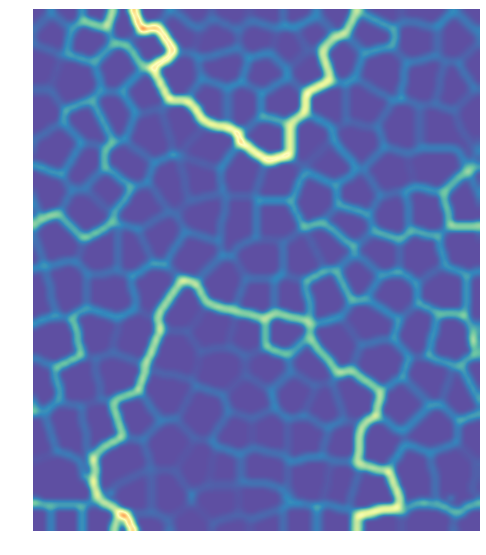

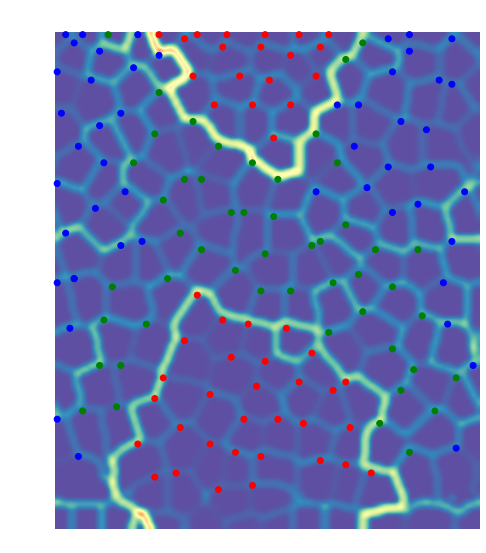

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [6]:
som.view_umatrix()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

Responda:

1.1 ¿Qué es la matrix U (En inglés U-matrix) de un SOM?


La representación en matriz U (matriz de distancia unificada) del Mapa autoorganizado visualiza las distancias entre las neuronas. La distancia entre las neuronas adyacentes se calcula y se presenta con diferentes colores entre los nodos adyacentes. Una coloración oscura entre las neuronas corresponde a una gran distancia y, por lo tanto, una brecha entre los valores del "codebook" en el espacio de entrada. Un color claro entre las neuronas significa que los vectores del "codebook" están cerca uno del otro en el espacio de entrada. Las áreas claras se pueden pensar como grupos y las áreas oscuras como separadores de grupos. Esta puede ser una presentación útil cuando se intenta encontrar grupos en los datos de entrada sin tener ninguna información a priori sobre los grupos.

1.2 ¿Cómo se pueden interpretar las gráficas obtenidas en el punto anterior? Describa detalladamente lo que observa e interprételo de acuerdo con la definición que dio en el punto 1.1

El gráfico representa la neurona ganadora, cuando esta modifica su peso, la vecindad cambia también 
La neurona ganadora se calcula midiendo la distancia euclídea entre el patrón de entrada x y el vector de pesos.

Ejecute la siguiente instrucción:

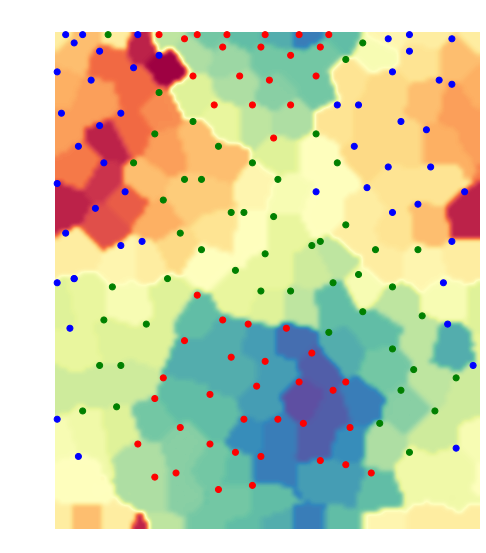

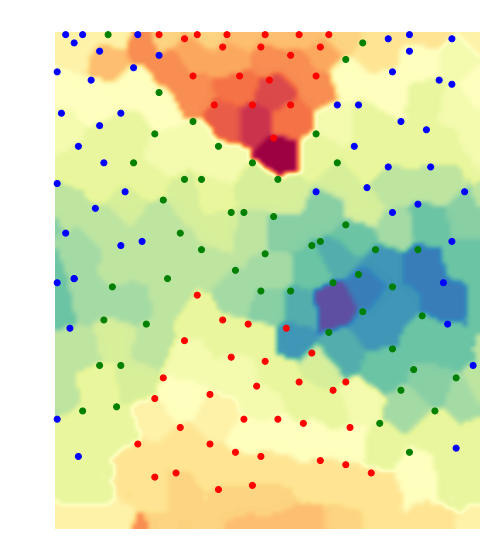

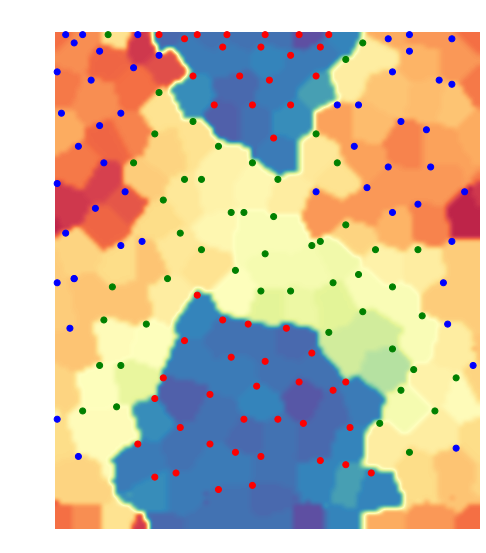

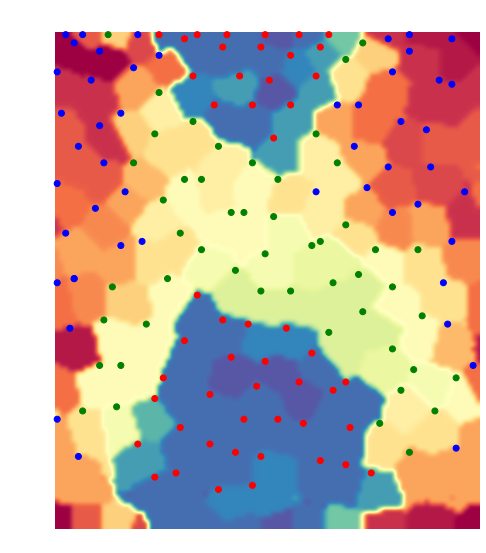

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [7]:
som.view_component_planes(bestmatches=True,bestmatchcolors=colors)

Responda:

1.3 ¿Qué se está gráficando en las figuras? 



Para ver la relación de las características en la entrada. Es decir, los puntos son las muestras, los colores de los puntos son las clases (4 clases) y los colores del plano significan que si hay una zona muy oscura, se puede ver como una frontera de separación y si es un color claro, se puede ver como un grupo. 


1.4 ¿Qué utilidad tienen las gráficas anteriores?

Para ver como se ajustaron los pesos en el entrenamiento de la red para cada característica


1.5 ¿De acuerdo con las gráficas anteriores cuáles variables en el problema están correlacionadas?

Son 4 gráficas ya que son 4 características en el problema, según la distribución de colores y formas, la gráfica 3 y 4 son muy similares, esto significa que la característica 3 y 4 están correlacionadas

## Ejercicio 2

Repita el proceso anterior para los datos del problema de reconocimiento de dígitos escritos a mano. Ejecute la siguiente celda para cargar los datos

In [8]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target

#Definimos una lista de colores de acuerdo con las clases en Y
color = []
for i in range(len(Y)):
    if Y[i] == 0:
        color.append('red')
    elif Y[i] == 1:
        color.append('blue')
    elif Y[i] == 2:
        color.append('green')
    elif Y[i] == 3:
        color.append('yellow')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

Entrene un SOM a partir de los datos cargados en la celda anterior. En este caso utilice un SOM con una capa de neuronas de dimension 150 por 150.

In [9]:
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X);

som = somoclu.Somoclu(n_columns=150, n_rows=150, maptype="toroid", compactsupport=False)
som.train(data = Xn,epochs=100)

Una vez entrenado el SOM, ejecute la siguiente celda

In [21]:
len(X)

720

In [23]:
X.shape

(720, 39)

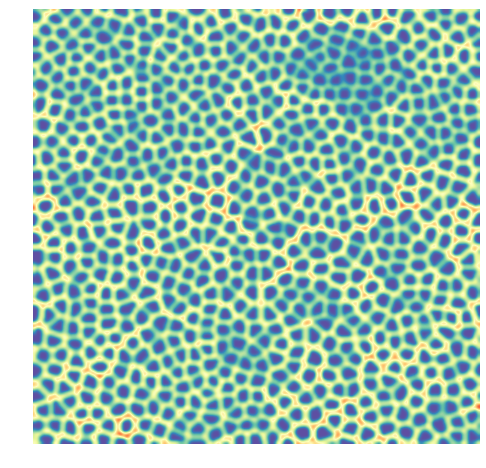

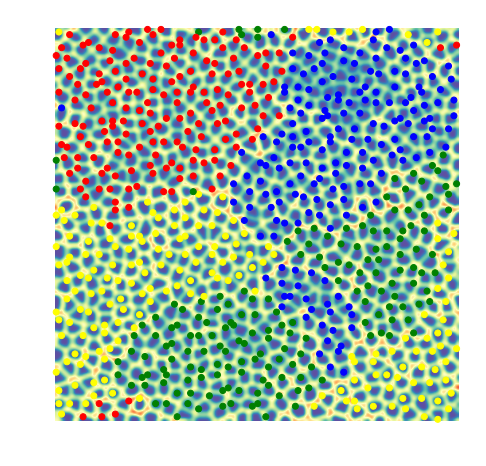

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [10]:
som.view_umatrix()
som.view_umatrix(bestmatches=True, bestmatchcolors=color)

Responda:

2.1 ¿Qué diferencia observa entre la matrix U en este caso vs el anterior?


Hay más clases (4) y más muestras (720), lo que significa que el modelo es más complejo y más denso, además, las dimensiones de de la cuadricula de neuronas de la primera es de 120x100 y la de esta es de 150x150, por esto hay más vecindades y la distancia entre estas es menor. 


2.2 ¿Qué puede concluir a partir de la gráfica que incluye la ubicación de las neuronas ganadoras para cada muestra de entrada?

Las neuronas ganadoras se calculan a partir de la mínima distancia, entonces, se puede concluir que cada clase está representada por las neuronas más cercanas. Son muchas neuronas por cada clase, pero no se sabe el número exacto de cada una. Como son 4 clases hay colores diferentes. 

## Ejercicio 3

En este ejercicio entrenaremos una Red Neuronal Recurrente para la predicción de una serie de tiempo. Este problema corresponde a una configuración many-to-many. En este caso usaremos una serie de tiempo que corresponde al número de pasajeros internacionales por mes, desde el año 1949 hasta el año 1960. La serie de tiempo puede ser consultada en: https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


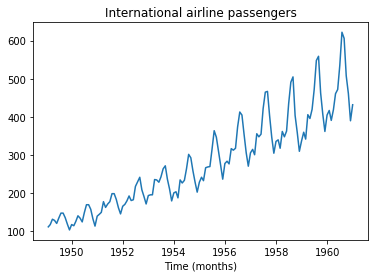

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#---- Tiempos para los datos originales---
date_begin = np.datetime64('1949-01')
date_end = np.datetime64('1961-01')
Time = pd.date_range(date_begin, date_end, freq='M')

plt.plot(Time,dataset)
plt.title('International airline passengers')
plt.xlabel('Time (months)')
plt.show()

El paquete que usaremos en este caso para el entrenamiento de redes neuronales recurrentes es neurolab (use la instrucción pip install neurolab), la documentación puede ser consultada en : https://pythonhosted.org/neurolab/.

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 

3.1 Complete el código siguiente y entrene una red neuronal recurrente de Elman, con una capa oculta y una capa de salida. Use función de activación tangente hiperbólica para la capa oculta y lineal para la capa de salida. Use un número de épocas igual a 1000, y un objetivo de error inferior a 0.00001. Inicialice los pesos de las capas aleatoriamente entre [-0.1, 0.1].

In [13]:
import neurolab as nl
from sklearn.preprocessing import MinMaxScaler
random.seed(19680801)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t-look_back+1:t and Y=t+1
look_back = 1 # Retardos de tiempo por muestra
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#Esta variable se requiere para definir la red de acuerdo con la librería neurolab. Define el número de entradas y el rango de valores que toma cada entrada
layers = []
for i in range(look_back):
    layers.append([0, 1])

# Crear la red e inicializar los pesos. 
neuronas = 10

# Entrenar la red con los datos de entrenamiento

net = nl.net.newelm(layers, [neuronas, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
  
net.init()

ECM = net.train(trainX, trainY.reshape(trainX.shape[0],1), epochs=1000, show=200, goal=0.00001)

# Evaluar la red con los datos de test

output = net.sim(testX)

# Calculo de error

Error = MAPE(output,testY)

print('MAPE = ' + str(np.mean(Error)))

Epoch: 200; Error: 0.0021689060049152453;
Epoch: 400; Error: 0.0020069883031246924;
Epoch: 600; Error: 0.0019057218336536721;
Epoch: 800; Error: 0.0019018304746997133;
Epoch: 1000; Error: 0.0018943906077310045;
The maximum number of train epochs is reached
MAPE = 0.12387435250995155


3.1 Haga una gráfica de la salida real vs la mejor predicción hecha por la red. Recuerde incluir los tiempos apropiados en el eje x y usar el método plt.legend() para identificar cuál es la serie real y cual la predicción.

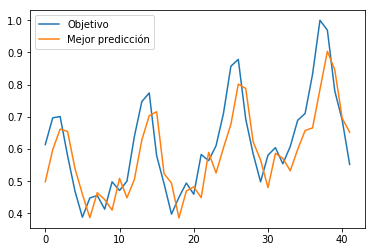

In [14]:
# Gráfica
plt.plot(testY)
plt.plot(output)
plt.legend(['Objetivo', 'Mejor predicción'])

3.2 Una vez compoletado el código realice los experimentos necesarios para llenar la siguiente tabla: 

In [0]:
def prueba(ret, neu):
  random.seed(19680801)
  dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
  # normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)
  # split into train and test sets
  train_size = int(len(dataset) * 0.7)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  # reshape into X=t-look_back+1:t and Y=t+1
  look_back = ret # Retardos de tiempo por muestra
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)

  #Esta variable se requiere para definir la red de acuerdo con la librería neurolab. 
  #Define el número de entradas y el rango de valores que toma cada entrada

  layers = []
  for i in range(look_back):
      layers.append([0, 1])

  # Crear la red e inicializar los pesos. 
  net = nl.net.newelm(layers, [neu, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

  net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
  net.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')

  net.init()

  # Entrenar la red con los datos de entrenamiento
  net.train(trainX, trainY.reshape(trainX.shape[0],1), epochs=1000, goal=0.00001)

  # Evaluar la red con los datos de test
  output = net.sim(testX)

  # Calculo de error
  Error = MAPE(output,testY)
  
  return np.mean(Error)

In [16]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Retardos de tiempo por muestra' : pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]),
    'Neuronas por capa' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types["MAPE"] = ""
df_types.set_index(['Retardos de tiempo por muestra','Neuronas por capa'], inplace=True)
#df_types.sort_index(inplace=True)

for i in df_types.index:
        
    mape = prueba(i[0], i[1])
    
    df_types["MAPE"][i] = str(mape)

df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)

/usr/local/lib/python3.6/dist-packages/ipywidgets/widgets/widget.py:282: DeprecationWarning: Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.
  warnings.warn("Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qgrid/grid.py:573: DeprecationWarning: metadata {'sync': True} was set from the constructor. With traitlets 4.1, metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  _df_json = Unicode('', sync=True)


Epoch: 100; Error: 0.018288540656380397;
Epoch: 200; Error: 0.0024964411953478163;
Epoch: 300; Error: 0.0020820334814228153;
Epoch: 400; Error: 0.001930556768793353;
Epoch: 500; Error: 0.0019225934979861348;
Epoch: 600; Error: 0.0019158144400718503;
Epoch: 700; Error: 0.0019195792919242541;
Epoch: 800; Error: 0.0018952435289607923;
Epoch: 900; Error: 0.002090491939305284;
Epoch: 1000; Error: 0.0018801243847247878;
The maximum number of train epochs is reached
Epoch: 100; Error: 0.01826861312510988;
Epoch: 200; Error: 0.0021689060049152453;
Epoch: 300; Error: 0.0019420138335285676;
Epoch: 400; Error: 0.0020069883031246924;
Epoch: 500; Error: 0.0019172376575234786;
Epoch: 600; Error: 0.0019057218336536721;
Epoch: 700; Error: 0.002001203236648856;
Epoch: 800; Error: 0.0019018304746997133;
Epoch: 900; Error: 0.0018773480404277712;
Epoch: 1000; Error: 0.0018943906077310045;
The maximum number of train epochs is reached
Epoch: 100; Error: 0.017492197747412022;
Epoch: 200; Error: 0.0022205466

/usr/local/lib/python3.6/dist-packages/qgrid/grid.py:827: DeprecationWarning: QgridWidget._df_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _df_changed(self):


Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [17]:
qgrid_widget.get_changed_df()

MAPE
Retardos de tiempo por muestra Neuronas por capa                     
1                              5                  0.12473276507035648
                               10                 0.12387435250995155
                               15                 0.12494025237563555
                               20                  0.1263146658121836
                               25                  0.1259966297506807
                               30                 0.12609710344748157
2                              5                  0.12145274882804885
                               10                   0.126968824219195
                               15                  0.1178118230190535
                               20                 0.11695318783186985
                               25                 0.11738793858429569
                               30                 0.12348623729060934
3                              5                  0.12105476027980192
                               10                 0.12096757255310568
                               15                 0.11407508702126061
                               20                  0.1129700963104278
                               25                 0.11449521262915408
                               30                 0.11674891502718014
4                              5                  0.12475671628231297
                               10                  0.1259199827208433
                               15                  0.1259342977992137
                               20                 0.13075811901593054
                               25                 0.12381853036598439
                               30                 0.12787069099229303

Responda:

3.3 ¿Cuál fue la mejor configuración encontrada?



La mejor configuración encontrada fue con 3 de tiempo de retraso y 20 neuronas por capa

3.4 ¿Porqué seguir aumentando los tiempos de retardo no implica siempre una mejora en la predicción del modelo?

Porque devolverse mucho en el tiempo implica que haya un error, es decir, mientras más antiguo más ruido puede haber.

## *Ejercicio 4

Este ejercicio es opcional. Use una red neuronal tipo MLP para resolver el mismo problema de predicción del número de pasajeros y compare el resultado con el obtenido usando la red recurrente.

Error =  0.09712981502180316


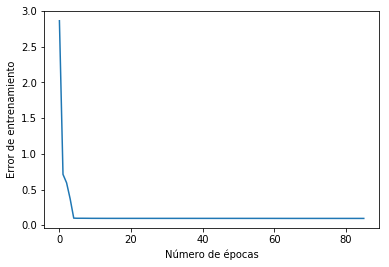

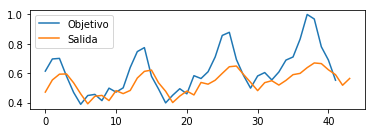

Costo computacional:  1.357503890991211  s


In [20]:
import time

tiempo = time.time()
net = nl.net.newff([[-1, 1]], [1, 1], transf=[nl.trans.TanSig(),nl.trans.PureLin()] )
error = net.train(trainX, trainY.reshape(98,1), epochs = 1000, show =100)
output = net.sim(test)

print('Error = ', error[-1])
plt.plot(error)
plt.xlabel('Número de épocas')
plt.ylabel('Error de entrenamiento')
plt.show()

plt.subplot(212)
plt.plot(testY)
plt.plot(output)
plt.legend(['Objetivo', 'Salida'])
plt.show()

print('Costo computacional: ', time.time() - tiempo, ' s')

Conclusión: Con un MLP hay menor error en la validación que con RNN, pues el error de este fue 0.097 y el menor error de RNN fue 0.113